In [70]:
# Initial Data Cleaning

import pandas as pd
import numpy as np

# Load the data
file_path = 'medical_clean.csv'
data = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = [
    'TotalCharge', 'VitD_levels', 'Age', 'Additional_charges', 'Doc_visits', 'Income', 'Initial_days', 'Gender', 'Complication_risk'
]

# Drop irrelevant columns
data_cleaned = data[columns_to_keep].copy()

# Check for duplicates
duplicates_exist = data_cleaned.duplicated().any()
if duplicates_exist:
    print("The dataset contains duplicates.")
else:
    print("No duplicates found in the dataset.")

# Check for missing values
missing_values_exist = data_cleaned.isnull().any().any()
if missing_values_exist:
    print("The dataset contains missing values.")
else:
    print("No missing values found in the dataset.")

# Check for outliers using an Interquartile Range (IQR)
outliers_exist = False
for column in ['TotalCharge', 'VitD_levels', 'Age', 'Income']:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)
    if outliers.any():
        outliers_exist = True
        below_count = (data_cleaned[column] < lower_bound).sum()
        above_count = (data_cleaned[column] > upper_bound).sum()
        print(f"Outliers detected in column: {column}")
        print(f"Number of outliers below {lower_bound}: {below_count}")
        print(f"Number of outliers above {upper_bound}: {above_count}")
       
if not outliers_exist:
    print("No outliers found in the dataset.")

# Save the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_linear_data.csv', index=False)
print("Cleaned data saved to 'cleaned_linear_data.csv'.")

No duplicates found in the dataset.
No missing values found in the dataset.
Outliers detected in column: VitD_levels
Number of outliers below 12.544152781249997: 27
Number of outliers above 23.430248331250006: 33
Outliers detected in column: Income
Number of outliers below -32447.666249999987: 0
Number of outliers above 106342.84374999999: 326
Cleaned data saved to 'cleaned_linear_data.csv'.


In [72]:
# Summary Statistics of Dataset
import pandas as pd

# Load the dataset
file_path = 'cleaned_linear_data.csv'  # Update this path as necessary
data = pd.read_csv(file_path)

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# Summary statistics for numeric variables
numeric_summary = data[numeric_cols].describe()

# Summary statistics for categorical variables (counts and proportions)
categorical_summary = {}
for col in categorical_cols:
    value_counts = data[col].value_counts()
    proportions = value_counts / len(data)
    categorical_summary[col] = pd.DataFrame({
        'Count': value_counts,
        'Proportion': proportions
    })

# Display results
print("Summary Statistics for Numeric Variables:")
print(numeric_summary)

print("\nSummary Statistics for Categorical Variables:")
for col, summary in categorical_summary.items():
    print(f"\n{col}:")
    print(summary)


Summary Statistics for Numeric Variables:
        TotalCharge   VitD_levels           Age  Additional_charges  \
count  10000.000000  10000.000000  10000.000000        10000.000000   
mean    5312.172769     17.964262     53.511700        12934.528587   
std     2180.393838      2.017231     20.638538         6542.601544   
min     1938.312067      9.806483     18.000000         3125.703000   
25%     3179.374015     16.626439     36.000000         7986.487755   
50%     5213.952000     17.951122     53.000000        11573.977735   
75%     7459.699750     19.347963     71.000000        15626.490000   
max     9180.728000     26.394449     89.000000        30566.070000   

         Doc_visits         Income  Initial_days  
count  10000.000000   10000.000000  10000.000000  
mean       5.012200   40490.495160     34.455299  
std        1.045734   28521.153293     26.309341  
min        1.000000     154.080000      1.001981  
25%        4.000000   19598.775000      7.896215  
50%        5

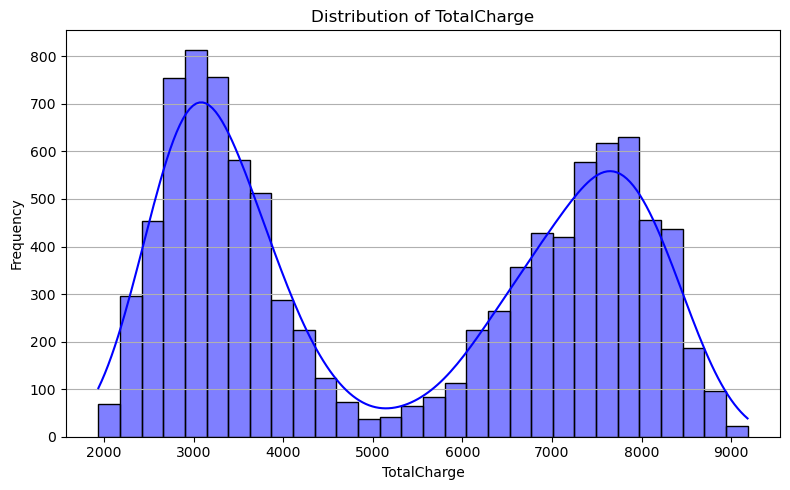

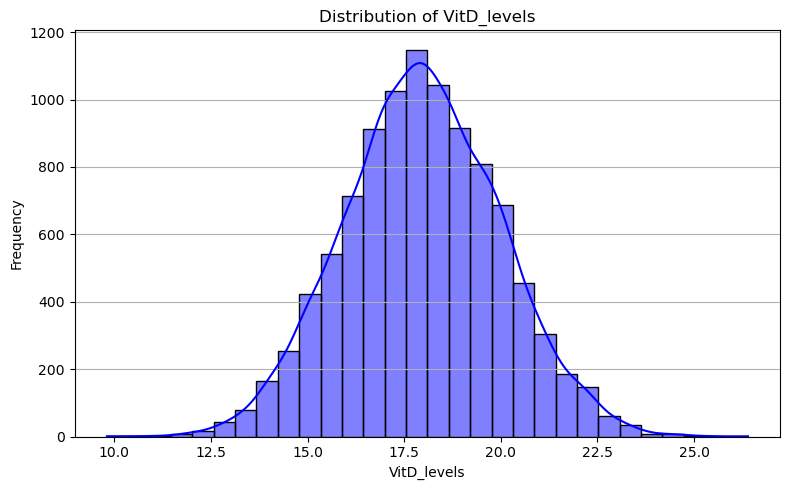

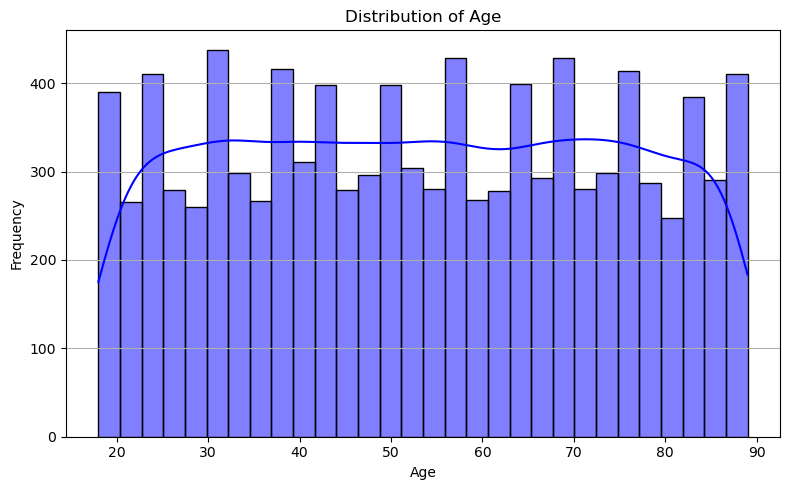

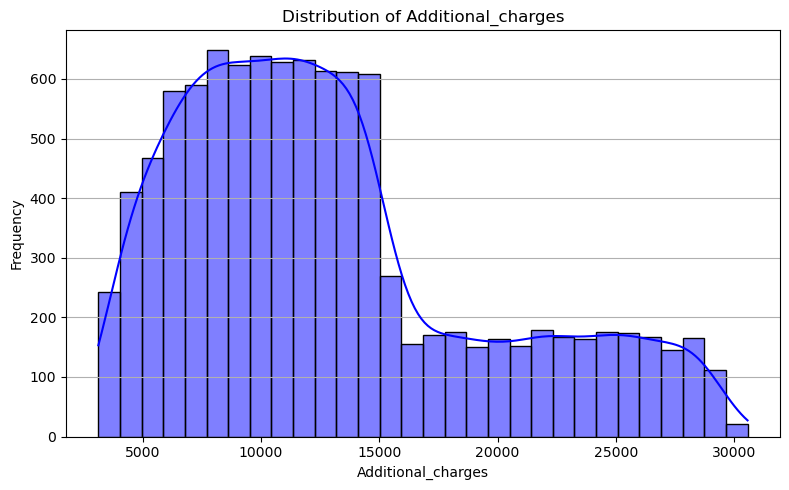

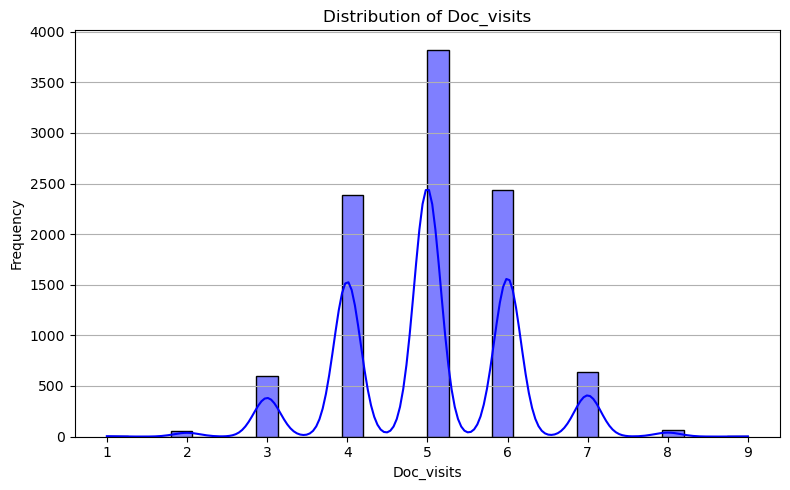

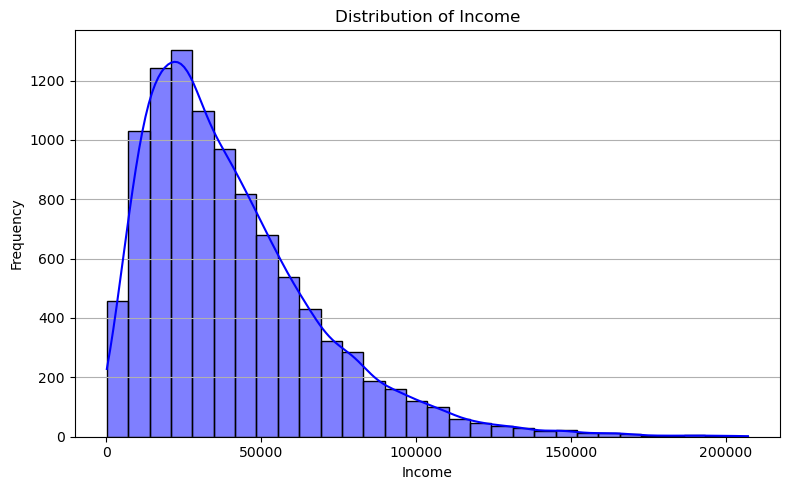

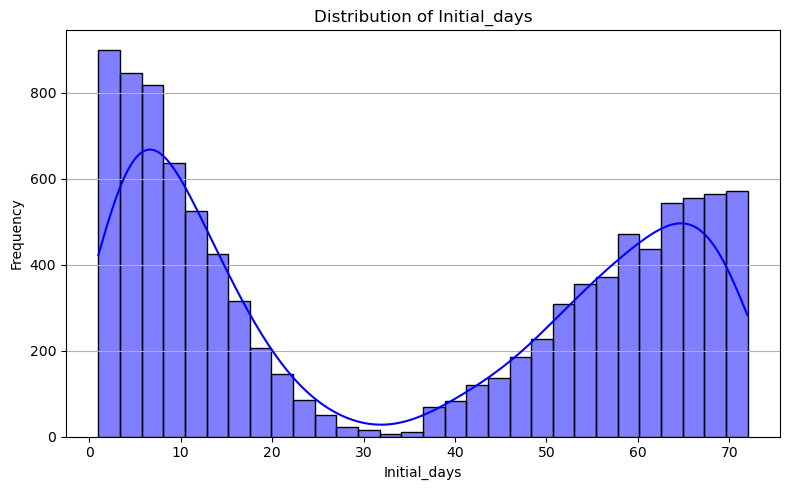

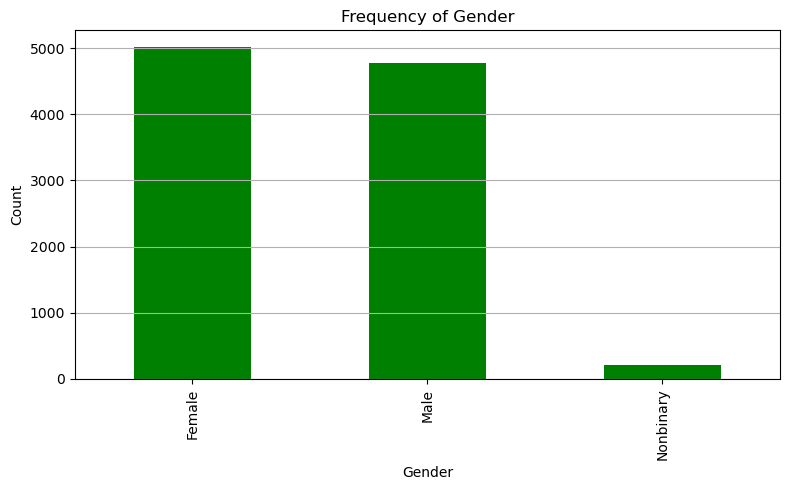

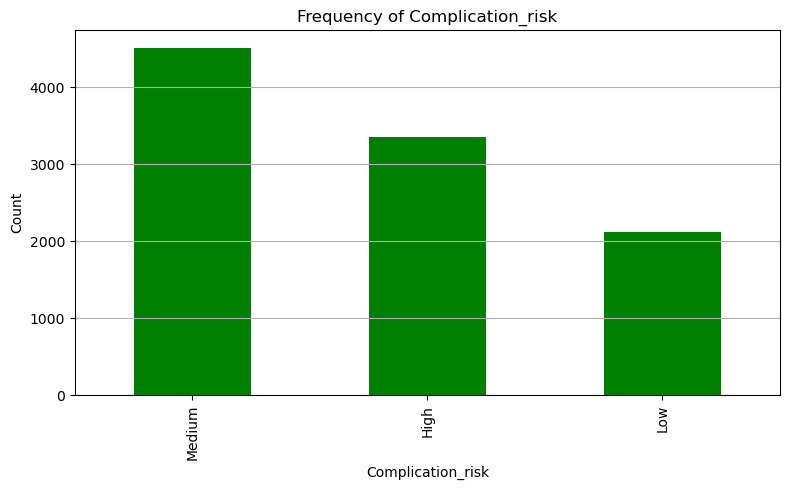

In [74]:
# Create Univariate Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations for each column
for column in data.columns:
    plt.figure(figsize=(8, 5))
    if data[column].dtype in ['float64', 'int64']:  # Numerical variables
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
    else:  # Categorical variables
        data[column].value_counts().plot(kind='bar', color='green')
        plt.title(f"Frequency of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


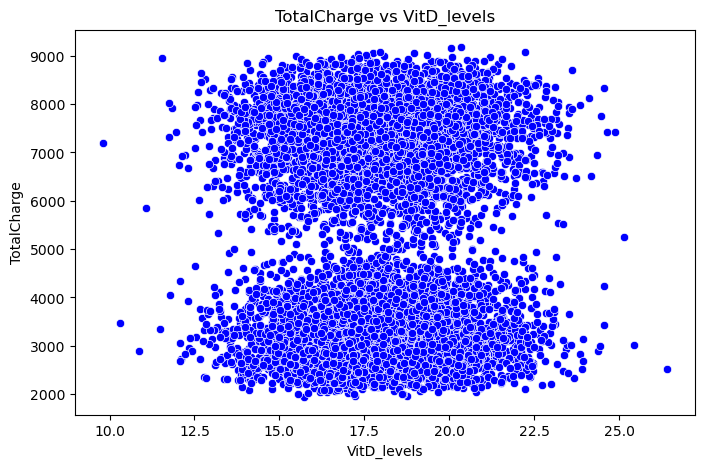

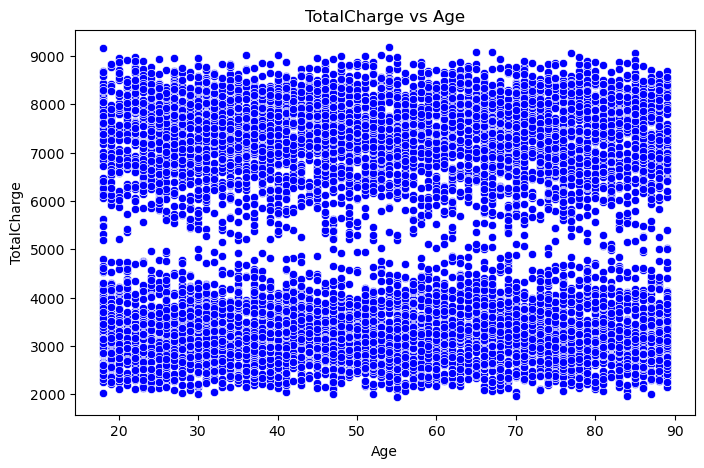

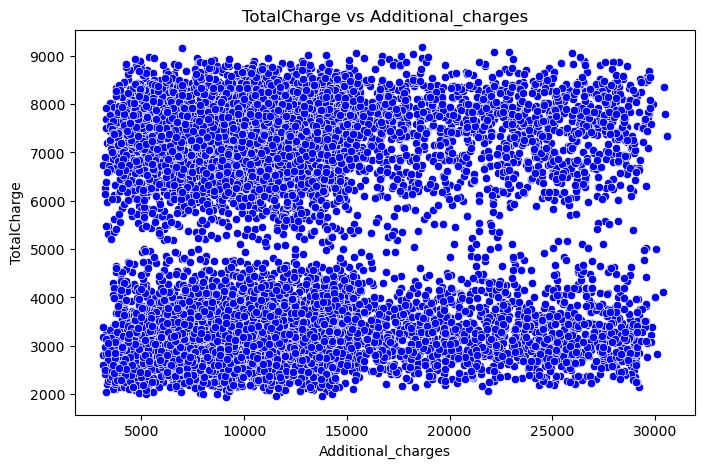

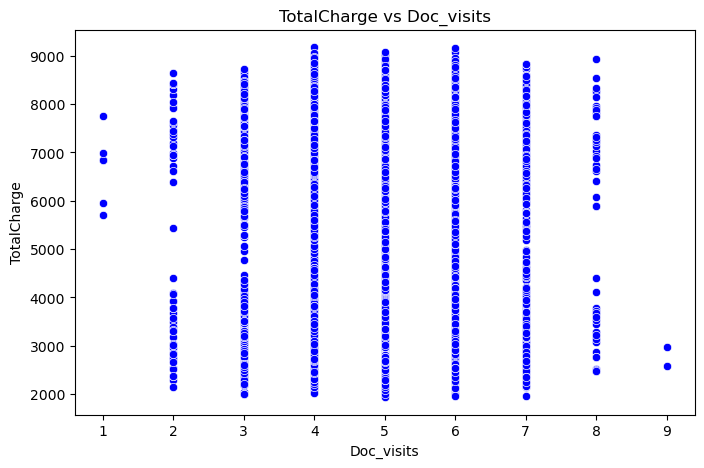

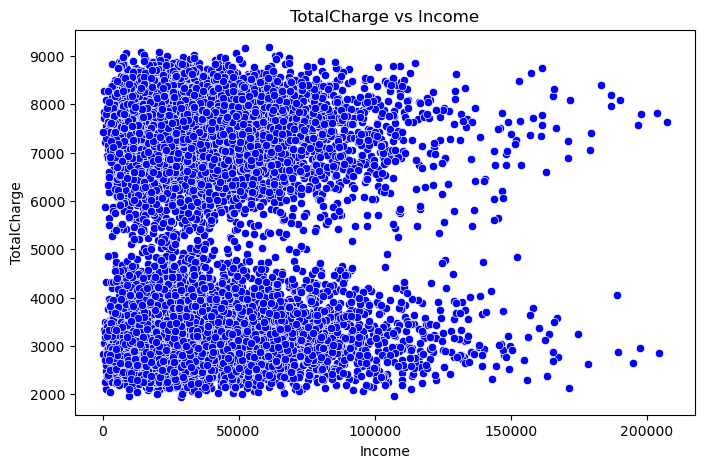

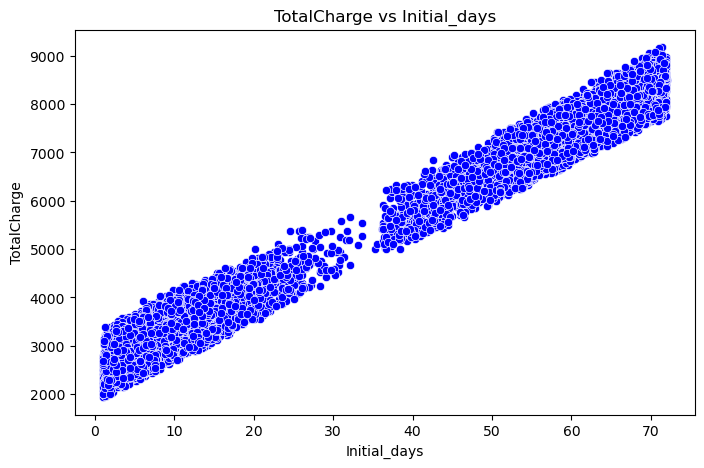

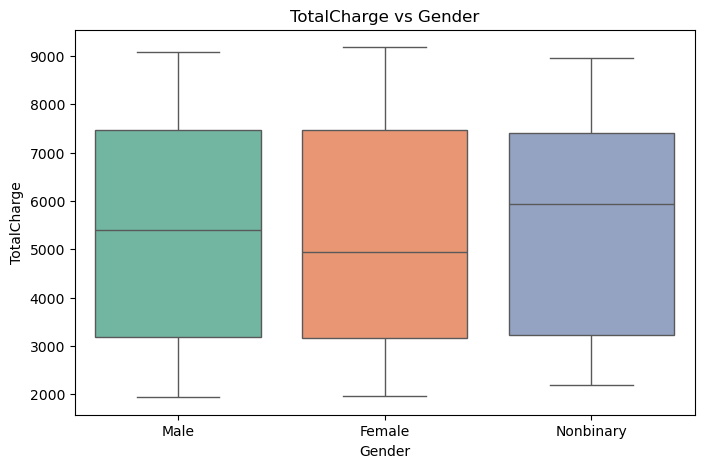

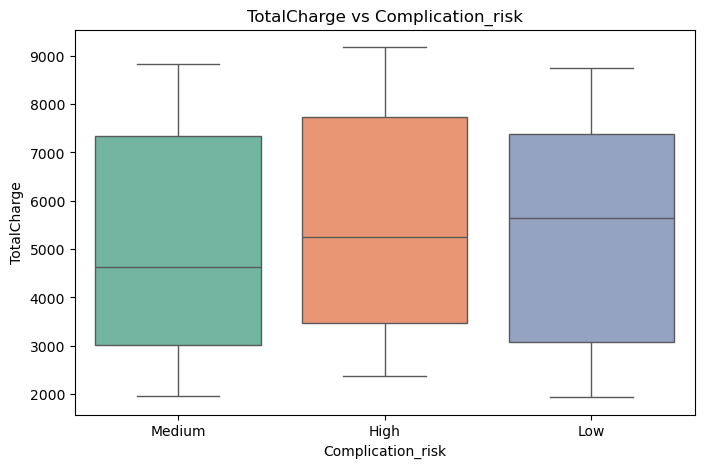

In [76]:
# Create Bivariate Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent and independent variables
dependent_var = "TotalCharge"
independent_vars = [col for col in data.columns if col != dependent_var]

# Generate bivariate visualizations
for column in independent_vars:
    plt.figure(figsize=(8, 5))
    if data[column].dtype in ['float64', 'int64']:  
        sns.scatterplot(x=data[column], y=data[dependent_var], color='blue')
        plt.title(f"{dependent_var} vs {column}")
        plt.xlabel(column)
        plt.ylabel(dependent_var)
    else:  # Categorical variables
        sns.boxplot(x=data[column], y=data[dependent_var], hue=data[column], palette='Set2', dodge=False)
        plt.title(f"{dependent_var} vs {column}")
        plt.xlabel(column)
        plt.ylabel(dependent_var)
        plt.legend([],[], frameon=False)  # Removes redundant legend
    
  


In [78]:
# Data Transformation

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Load the data
file_path = 'cleaned_linear_data.csv'
data = pd.read_csv(file_path)



# Ordinal encoding for Complication_risk
if 'Complication_risk' in data.columns:
    ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
    data['Complication_risk_encoded'] = ordinal_encoder.fit_transform(data[['Complication_risk']])
    data.drop('Complication_risk', axis=1, inplace=True)

# One-hot encoding for Gender
if 'Gender' in data.columns:
    # One-hot encode Gender only if more than two categories exist
    if len(data['Gender'].unique()) > 2:
        data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
    else:
        # Convert binary Gender column to 0/1
        data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Ensure specified columns are binary (1 for True, 0 for False)
binary_columns = ['Gender_Male', 'Gender_Nonbinary', 'Complication_risk_encoded']
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].astype(int)


# Save the processed data to a CSV file
processed_file_path = 'processed_linear_data.csv'
data.to_csv(processed_file_path, index=False)

print(f"Processed data saved to {processed_file_path}")


Processed data saved to processed_linear_data.csv


In [81]:
# Initial Model

import pandas as pd
import statsmodels.api as sm

# Load the processed dataset
file_path = 'processed_linear_data.csv'
data = pd.read_csv(file_path)

# Define dependent and independent variables
dependent_var = 'TotalCharge'
independent_vars = ['VitD_levels', 'Age', 'Additional_charges', 'Doc_visits',
                    'Income', 'Initial_days', 'Gender_Male', 'Complication_risk_encoded']

# Ensure all variables are numeric
X = data[independent_vars].apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(data[dependent_var], errors='coerce')

# Check for missing values
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("Data contains missing or non-numeric values. Check the dataset.")

# Add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Build the multiple linear regression model
model = sm.OLS(y, X).fit()

# Summarize the regression model
regression_summary = model.summary()
print(regression_summary)


                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 6.863e+04
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:39:38   Log-Likelihood:                -70939.
No. Observations:               10000   AIC:                         1.419e+05
Df Residuals:                    9991   BIC:                         1.420e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
# Reduced Model

# Check initial VIFs for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIFs for all variables in the initial model
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Start backward elimination based on p-values
variables = independent_vars.copy()
reduced_model = model  # Initial model as starting point

# Perform backward elimination
while True:
    p_values = reduced_model.pvalues[1:]  # Exclude the intercept
    max_p_value = p_values.max()
    if max_p_value > 0.05:  # Check for any variable with p-value > 0.05
        max_p_var = p_values.idxmax()  # Get the variable name with the highest p-value
        variables.remove(max_p_var)  # Remove the variable
        X_reduced = sm.add_constant(data[variables])  # Update the data for reduced variables
        reduced_model = sm.OLS(y, X_reduced).fit()  # Refit the model
    else:
        break  # Stop when all variables have p-values <= 0.05

# Step 3: Final VIF check for the reduced model
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Variable'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Step 4: Summarize the reduced model
reduced_model_summary = reduced_model.summary()

# Display results
vif_data, vif_data_reduced, reduced_model_summary


(                    Variable         VIF
 0                      const  116.022781
 1                VitD_levels    1.000578
 2                        Age    2.063238
 3         Additional_charges    2.066386
 4                 Doc_visits    1.000580
 5                     Income    1.000667
 6               Initial_days    1.000820
 7                Gender_Male    1.000961
 8  Complication_risk_encoded    1.004324,
                     Variable        VIF
 0                      const  11.738169
 1                        Age   2.061611
 2         Additional_charges   2.065451
 3               Initial_days   1.000561
 4  Complication_risk_encoded   1.004165,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            TotalCharge   R-squared:                       0.982
 Model:                            OLS   Adj. R-squared:                  0.982
 Method:                 Least Squares   F

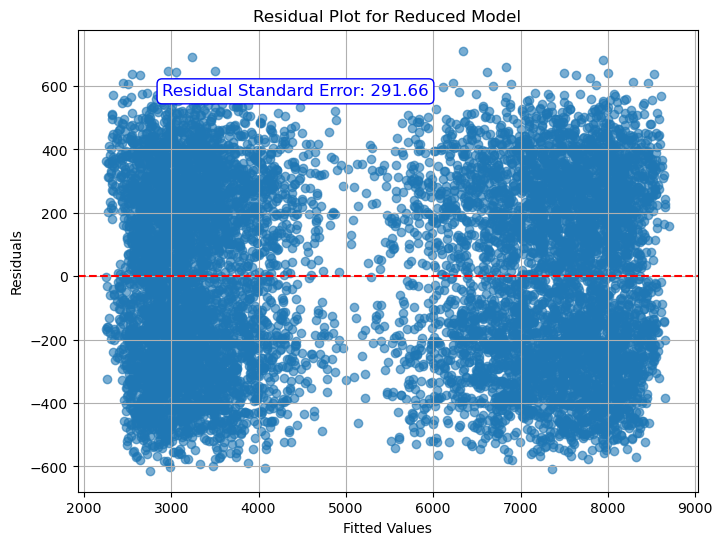

In [85]:
# Calculate fitted values and residuals for the reduced model
import numpy as np
import matplotlib.pyplot as plt 

# Calculate fitted values and residuals
fitted_values = reduced_model.fittedvalues
residuals = reduced_model.resid

# Calculate Residual Standard Error (RSE)
rse = np.sqrt(np.sum(residuals**2) / reduced_model.df_resid)

# Plot the residuals with RSE labeled
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot for Reduced Model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.text(
    x=min(fitted_values) + 0.1 * (max(fitted_values) - min(fitted_values)),
    y=max(residuals) * 0.8,
    s=f'Residual Standard Error: {rse:.2f}',
    fontsize=12,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')
)
plt.grid(True)
plt.show()

